In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import *

import pandas as pd

In [54]:
import pathlib
data_dir = "Data/public-cohen-subset/"
data_dir = pathlib.Path(data_dir)

In [55]:
image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

97


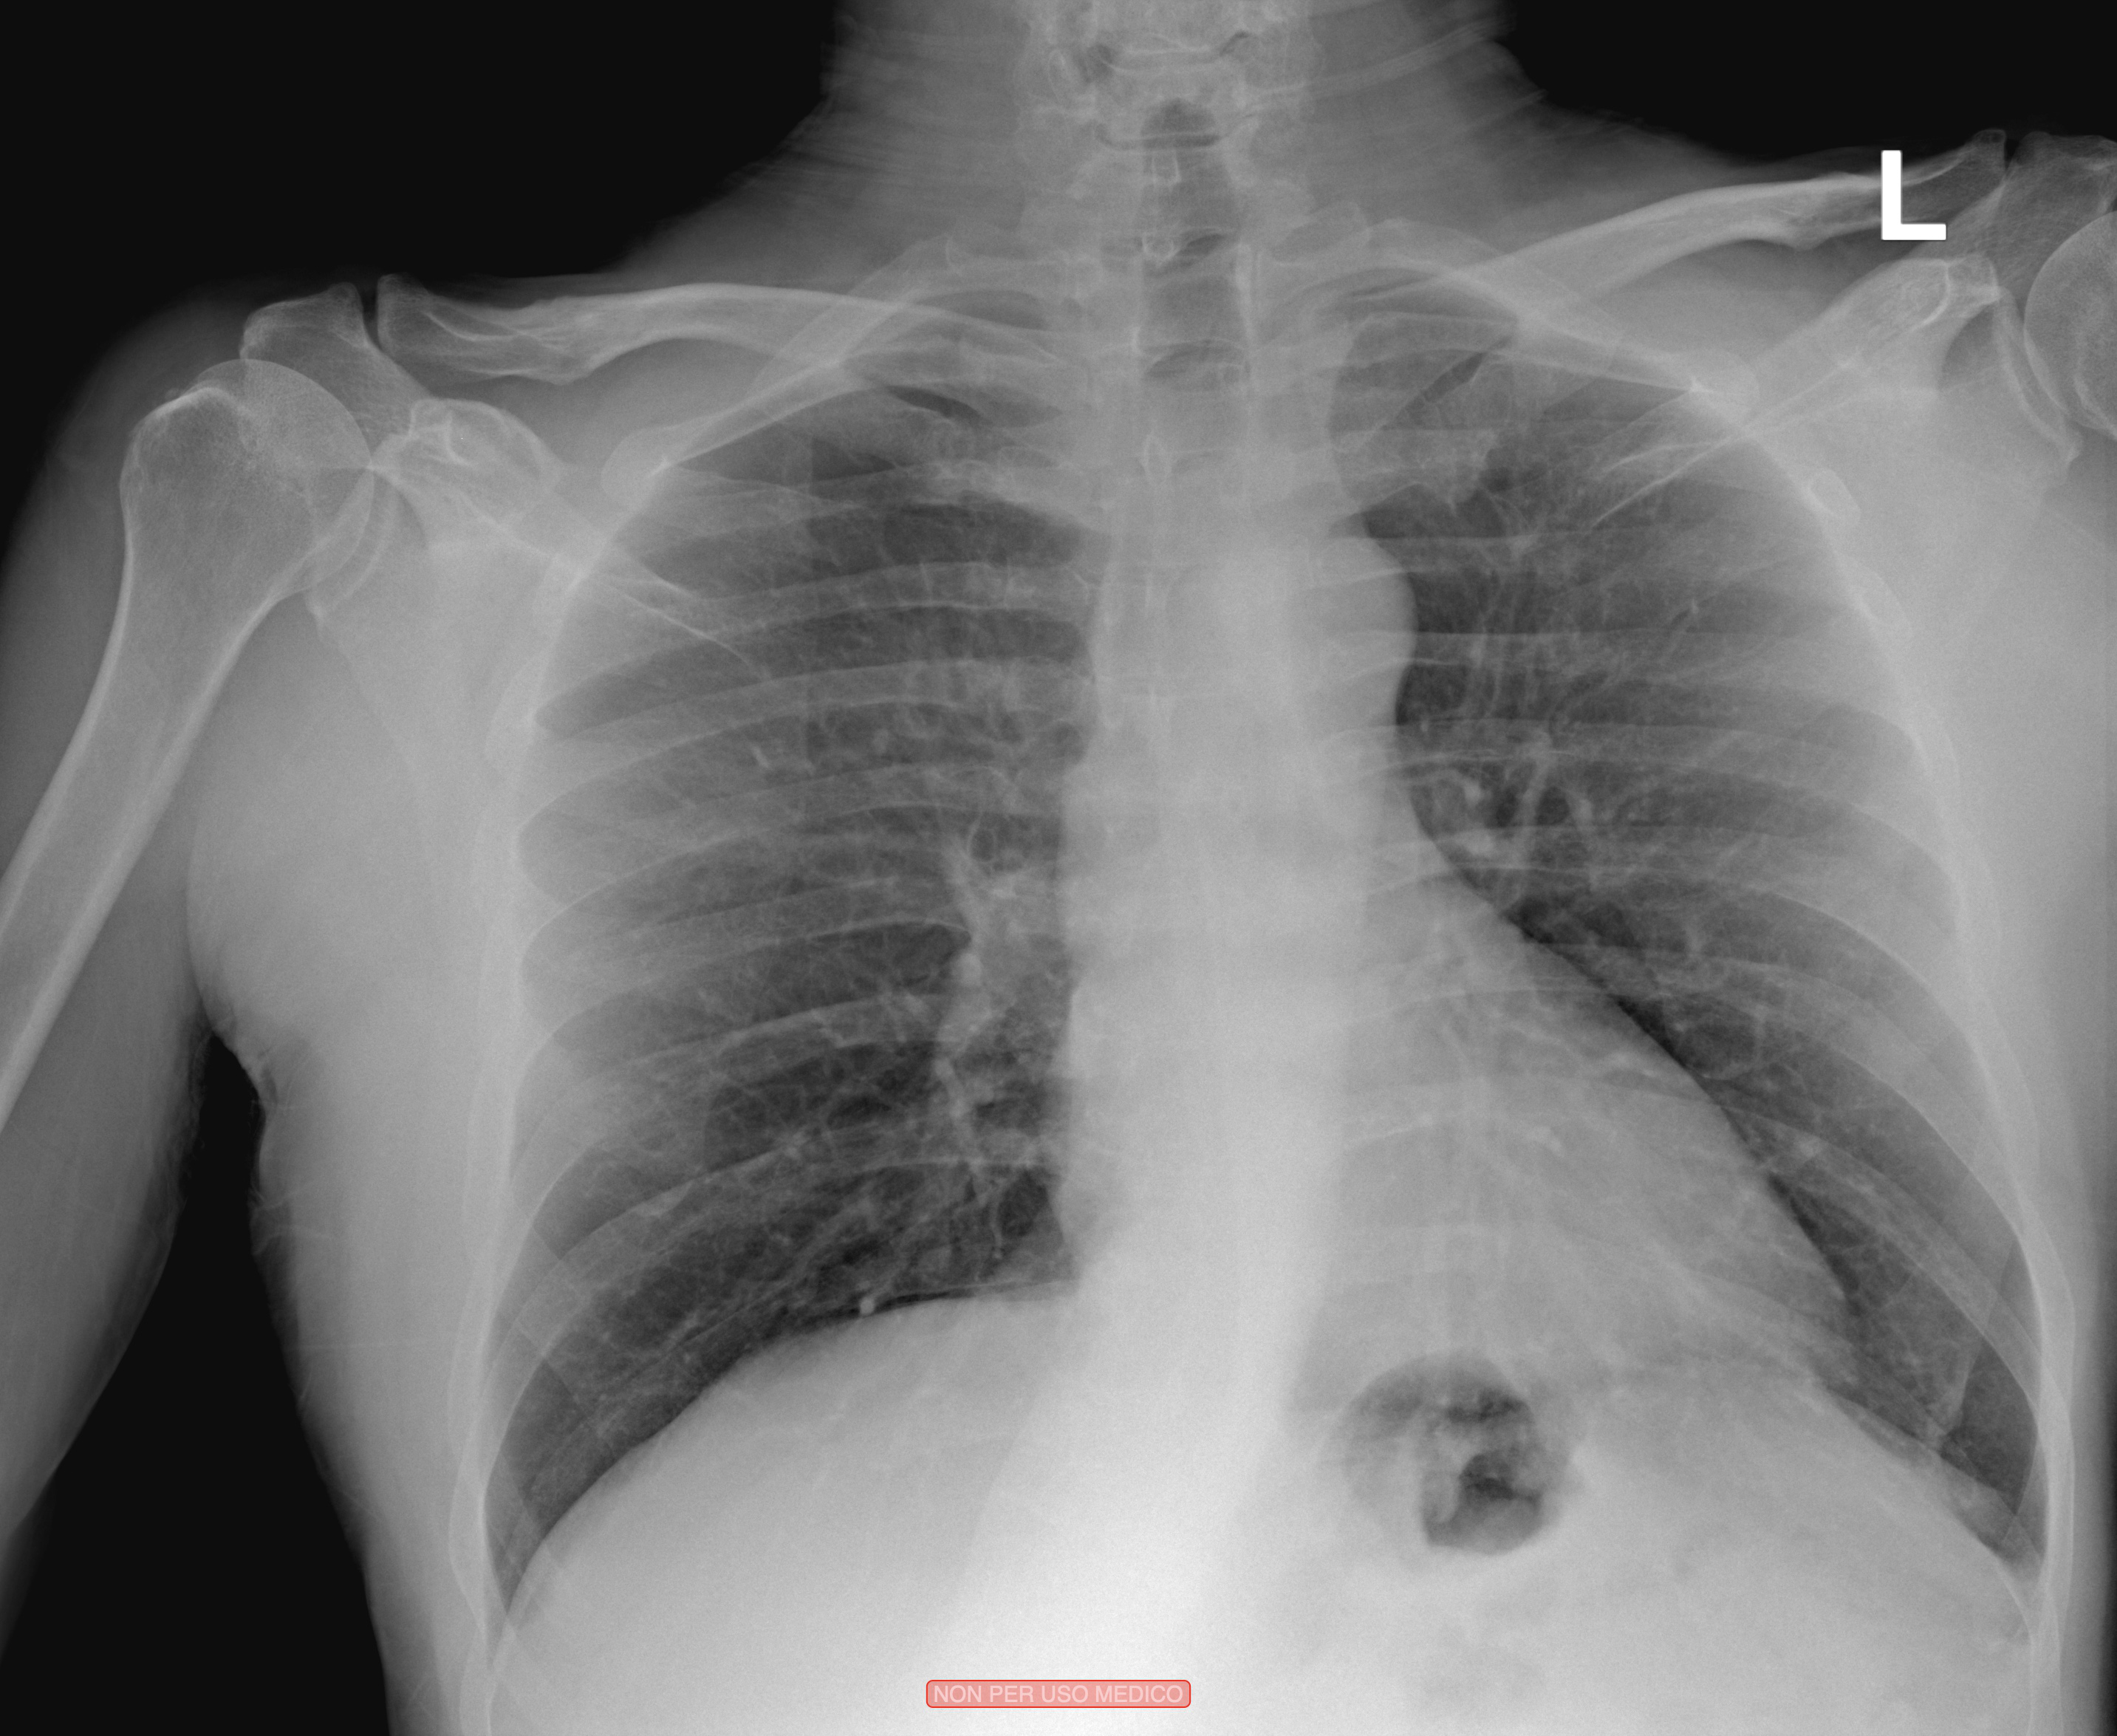

In [21]:
xrays = list(data_dir.glob('*.jpg'))
PIL.Image.open(str(xrays[0]))

In [22]:
batch_size = 32
img_height = 256
img_width = 256

In [32]:
df1 = pd.read_csv("Data/public-annotations.csv")
df1['s_class'] = 0

for i in range(192):
    if df1.iloc[i, 7] <= 6:
        df1.iloc[i, 15] = 0
        continue
    elif df1.iloc[i, 7] <= 12:
        df1.iloc[i, 15] = 1
        continue
    else:
        df1.iloc[i, 15] = 2

In [41]:
scores = df1['s_class']
scores = list(scores)

In [45]:
scores

[2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [53]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, 
    labels = scores,
    label_mode = 'int', 
    color_mode = "grayscale",
    shuffle = True,
    seed = 123,
    validation_split = .8, 
    subset = "training"
)

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'Data\\public-cohen-subset\\*'